In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()

In [3]:
print('train data:', 'images', X_img_train.shape,
     ' labels:', y_label_train.shape)
print('test data:', 'images', X_img_test.shape,
     ' labels:', y_label_test.shape)

train data: images (50000, 32, 32, 3)  labels: (50000, 1)
test data: images (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_onehot = np_utils.to_categorical(y_label_train)
y_label_test_onehot = np_utils.to_categorical(y_label_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32, kernel_size=(3,3),
                input_shape=(32,32,3),
                activation='relu',
                padding='same'))

In [9]:
model.add(Dropout(rate=0.25))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3,3),
                activation='relu', padding='same'))

In [12]:
model.add(Dropout(rate=0.25))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [15]:
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [18]:
model.compile(loss='categorical_crossentropy', 
             optimizer='adam', metrics=['accuracy'])

In [19]:
train_history = model.fit(X_img_train_normalize, y_label_train_onehot,
                         validation_split=0.2,
                         epochs=10, batch_size=128, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 13s - loss: 1.4998 - acc: 0.4596 - val_loss: 1.2827 - val_acc: 0.5766
Epoch 2/10
 - 8s - loss: 1.1423 - acc: 0.5929 - val_loss: 1.1236 - val_acc: 0.6339
Epoch 3/10
 - 8s - loss: 0.9895 - acc: 0.6524 - val_loss: 1.0142 - val_acc: 0.6667
Epoch 4/10
 - 8s - loss: 0.8827 - acc: 0.6893 - val_loss: 0.9514 - val_acc: 0.6899
Epoch 5/10
 - 8s - loss: 0.7921 - acc: 0.7225 - val_loss: 0.8822 - val_acc: 0.7056
Epoch 6/10
 - 8s - loss: 0.7125 - acc: 0.7484 - val_loss: 0.8400 - val_acc: 0.7177
Epoch 7/10
 - 8s - loss: 0.6310 - acc: 0.7804 - val_loss: 0.8128 - val_acc: 0.7315
Epoch 8/10
 - 7s - loss: 0.5651 - acc: 0.8021 - val_loss: 0.7715 - val_acc: 0.7456
Epoch 9/10
 - 7s - loss: 0.4901 - acc: 0.8293 - val_loss: 0.7790 - val_acc: 0.7336
Epoch 10/10
 - 7s - loss: 0.4410 - acc: 0.8444 - val_loss: 0.7678 - val_acc: 0.7380


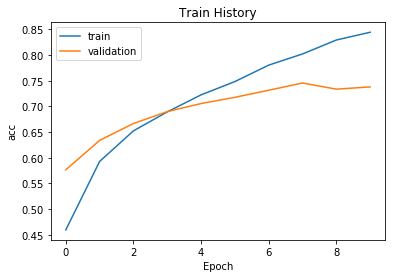

In [20]:
from def_function import show_train_history 
show_train_history(train_history,'acc', 'val_acc')

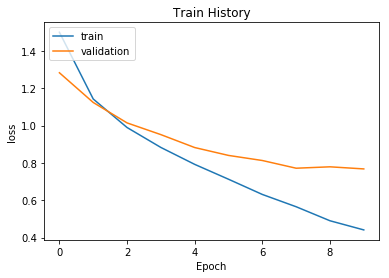

In [21]:
from def_function import show_train_history
show_train_history(train_history, 'loss', 'val_loss')

In [22]:
scores = model.evaluate(X_img_test_normalize,
                       y_label_test_onehot, verbose=0)
scores[1]

0.7379

In [23]:
prediction = model.predict_classes(X_img_test_normalize)

In [24]:
prediction[:10]

array([3, 8, 8, 8, 6, 6, 1, 6, 3, 1], dtype=int64)

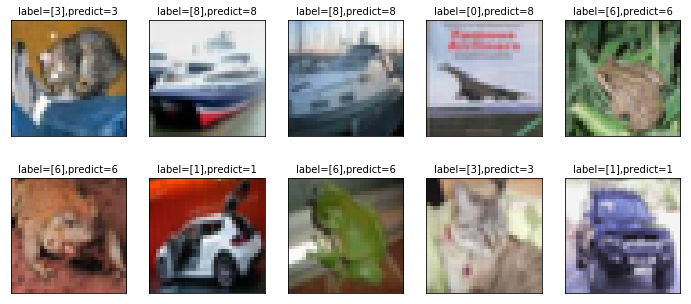

In [25]:
from def_function import plot_images_labels_prediction
plot_images_labels_prediction(X_img_test, y_label_test, prediction,0,10)

In [26]:
Predicted_Probability = model.predict(X_img_test_normalize)

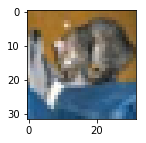

airplaneProbability:0.006741983
automobileProbability:0.001653039
birdProbability:0.018600391
catProbability:0.665668547
deerProbability:0.004487982
dogProbability:0.256852925
frogProbability:0.036759578
horseProbability:0.001648327
shipProbability:0.006266544
truckProbability:0.001320628


In [27]:
from def_function import show_Predicted_Probability
show_Predicted_Probability(y_label_test, prediction, X_img_test, Predicted_Probability, 0)

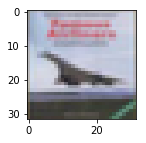

airplaneProbability:0.412256688
automobileProbability:0.010113816
birdProbability:0.136429086
catProbability:0.007337755
deerProbability:0.007190260
dogProbability:0.000114669
frogProbability:0.000441895
horseProbability:0.000078108
shipProbability:0.424470395
truckProbability:0.001567336


In [28]:
show_Predicted_Probability(y_label_test, prediction, X_img_test, Predicted_Probability, 3)

In [29]:
prediction.shape

(10000,)

In [30]:
y_label_test.shape

(10000, 1)

In [31]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [32]:
import pandas as pd
label_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction, rownames=['label'], colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,778,7,70,19,18,16,14,6,52,20
1,19,813,24,7,2,7,22,3,27,76
2,44,2,656,32,84,61,94,17,7,3
3,9,7,95,496,53,201,113,14,5,7
4,11,2,87,42,706,28,94,18,11,1
5,7,2,63,120,42,688,50,24,2,2
6,1,2,33,29,16,16,901,1,0,1
7,10,0,62,27,71,76,20,729,4,1
8,38,29,22,21,6,11,21,0,835,17
